In [14]:
!pip install SIRITVIS==1.1.8


In [2]:
from SIRITVIS import twitter_streamer, insta_streamer, reddit_streamer, cleaner, topic_model, topic_visualise, topic_mapper

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deftwolf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Run the streaming process to retrieve raw data based on the specified keywords

client_id = "XXXXXXXXXXXXX"
client_secret = "XXXXXXXXXXX"
user_agent = "Additional_Talk_XXX"


keywords = ['bitcoin','eth'] # default is None
save_path = ''
raw_data = reddit_streamer.RedditStreamer(client_id,client_secret,user_agent,save_path,keywords).run()

Start streaming: 20240501-204115
Start streaming: 20240501-204124
Stopped at: 20240501-204131
Start streaming: 20240501-204131
Stopped at: 20240501-204134


In [4]:
# raw_data variable might also be used as load_path attribute value
cleaner_obj = cleaner.Cleaner(data_source='/Users/deftwolf/Desktop/sample_dataset/Twitter/raw_data/',data_source_type='twitter')
# cleaner_obj.clean_data     # get cleaned dataset without saving it
cleaned_file = cleaner_obj.saving('/Users/deftwolf/Desktop/',data_save_name='dataset_file_name')

In [5]:
cleaned_file

,created_at,text,text_tokens,hashtags,center_coord_X,center_coord_Y,country
0,2023-01-09 17:49:19+00:00,Ready To Explore The Metaverse bitly metaverse...,"[ready, explore, metaverse, metaverse, blockch...","[#bitly, #metaverse, #blockchaintechnology, #b...",-1.565490,53.801956,United Kingdom
1,2023-01-09 18:08:33+00:00,Block :- a batch of transactions written to th...,"[block, batch, transaction, write, blockchain,...","[#Block, #transactions, #blockchain, #informat...",-3.231378,51.644373,United Kingdom
2,2023-01-09 18:11:17+00:00,Are you interested in having your business mar...,"[interested, have, business, market, have, log...","[#webdesign, #services, #blockchain, #nft, #fy...",-0.070603,51.464686,United Kingdom
3,2023-01-09 19:20:35+00:00,I just love . The first Play to Earn on Sui bl...,"[love, play, earn, sui, blockchain, game, chan...","[#Sui, #P2E]",-3.802785,56.011916,United Kingdom
4,2023-01-09 20:38:41+00:00,"Bitcoin miners Riot Blockchain (RIOT), Hut8 (H...","[bitcoin, miner, riot, blockchain, riot, hut, ...","[#btc, #btcmining, #crypto, #cryptoworld, #mar...",-2.585390,51.457877,United Kingdom
...,...,...,...,...,...,...,...
239,2023-01-16 22:19:40+00:00,"Bill Gates once said Banking is needed, Banks ...","[bill, gates, say, banking, need, bank, blockc...","[#wef23, #davos]",-3.179800,51.497001,United Kingdom
240,2023-01-16 22:51:35+00:00,ARE YOU GOING TO NEW 2023 TOUR POSSIBLY ANNOUN...,"[go, new, tour, possibly, announced, jan, repl...","[#bitcoin, #bitcoingold, #blockchain, #trading...",-1.434404,54.917531,United Kingdom
241,2023-01-16 22:52:41+00:00,Thanks for That's you trying to supporting and...,"[thank, try, support, make, effort, add, block...","[#Blockchain, #web3, #web3community]",0.314300,42.308346,Spain
242,2023-01-16 22:56:05+00:00,2/ when a truely digital currency is live it w...,"[digital, currency, live, interoperate, dlt, c...",[],-2.775131,54.068005,United Kingdom


In [10]:
# cleaned_file variable could also used as data_source attribute value

vis_model = topic_visualise.PyLDAvis(data_source=cleaned_file,num_topics=5,text_column='text')
vis_model.visualize()

The visualization is based on Latent Dirichlet Allocation (LDA) model.


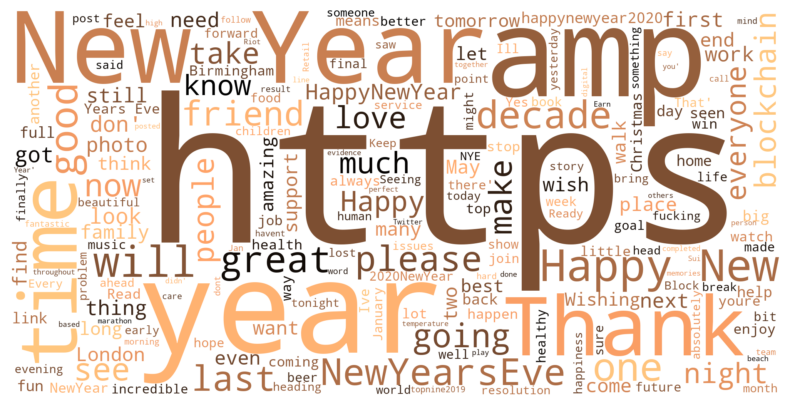

In [11]:
# The cleaned_file variable might also be used as data_source attribute value
# please wait for a while for the word cloud to appear.

vis_model = topic_visualise.Wordcloud(data_source=cleaned_file,text_column='text',save_image=False)
vis_model.visualize()

In [12]:
# cleaned_file variable might also be used as dataset_source attribute value

model = topic_model.TopicModeling(num_topics=10, dataset_source=cleaned_file,
learning_rate=0.001, batch_size=32, activation='softplus', num_layers=3, num_neurons=100,
dropout=0.2, num_epochs=100, save_model=False, model_path=None, train_model='NeuralLDA',evaluation=['topicdiversity','invertedrbo','jaccardsimilarity'])

saved_model = model.run()

100%|█████████████████████████████████████████| 244/244 [00:03<00:00, 79.66it/s]


created vocab
2143
Epoch: [1/100]	Samples: [168/16800]	Train Loss: 138.4268529982794	Time: 0:00:00.087336
Epoch: [1/100]	Samples: [37/3700]	Validation Loss: 126.69137655722129	Time: 0:00:00.001952
Epoch: [2/100]	Samples: [336/16800]	Train Loss: 138.25842939104353	Time: 0:00:00.021687
Epoch: [2/100]	Samples: [37/3700]	Validation Loss: 126.29054548933699	Time: 0:00:00.001972
Epoch: [3/100]	Samples: [504/16800]	Train Loss: 137.1595727829706	Time: 0:00:00.016720
Epoch: [3/100]	Samples: [37/3700]	Validation Loss: 126.15460040118244	Time: 0:00:00.001629
Epoch: [4/100]	Samples: [672/16800]	Train Loss: 137.40394882928757	Time: 0:00:00.016035
Epoch: [4/100]	Samples: [37/3700]	Validation Loss: 126.16530959670608	Time: 0:00:00.002466
Epoch: [5/100]	Samples: [840/16800]	Train Loss: 138.69305129278274	Time: 0:00:00.022888
Epoch: [5/100]	Samples: [37/3700]	Validation Loss: 126.0793556007179	Time: 0:00:00.002119
Epoch: [6/100]	Samples: [1008/16800]	Train Loss: 137.9928007579985	Time: 0:00:00.019146
E

In [13]:
# The cleaned_file variable might also be used as data_source attribute value
# The saved_model variable might also be used as the model_source attribute value, for example, model_source = saved_model

data_source = cleaned_file
model_source = saved_model
topic_mapper.TopicMapper(data_source, model_source)

interactive(children=(Dropdown(description='Select Topic To Visualize: <br>', options=(' ', 'read', 'absolutel…

Button(description='Export Map as HTML', style=ButtonStyle())

Output()